<a href="https://colab.research.google.com/github/moraish/ML_Concepts/blob/main/01_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

import matplotlib.pyplot as plt

torch.__version__

'2.4.1+cu121'

In [2]:
# creating known params
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02

# linear line
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Splitting the data into train and test sets

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")
    # plot testing data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data")
    # plot predictions in red
    if(predictions is not None):
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    plt.show()

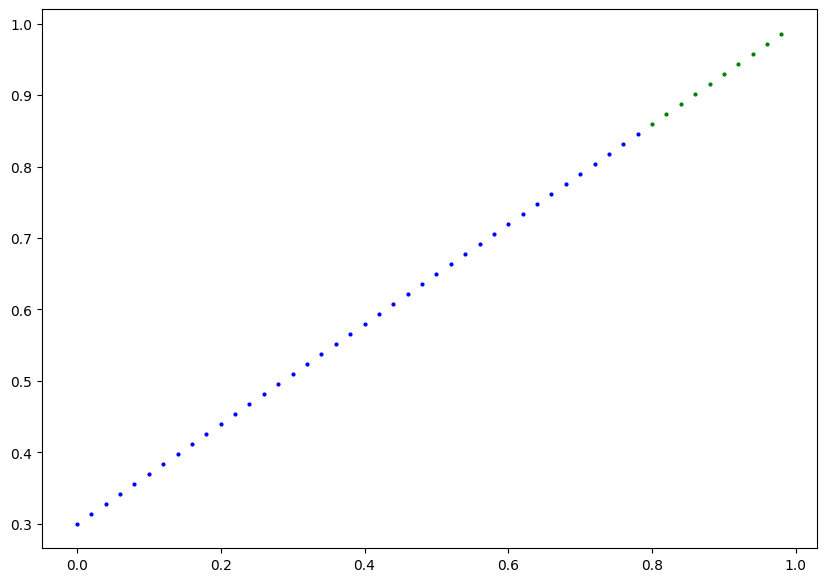

In [5]:
plot_predictions()

## Building a model

In [6]:
class LinearRegressModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x):
        return self.weight * x + self.bias

In [7]:
torch.manual_seed(42)

In [8]:
model_0 = LinearRegressModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [11]:
print("No of testing samples: ", len(X_test))
print("No of predictions made: ", len(y_preds))
print("Predicted values: ", y_preds)

No of testing samples:  10
No of predictions made:  10
Predicted values:  tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


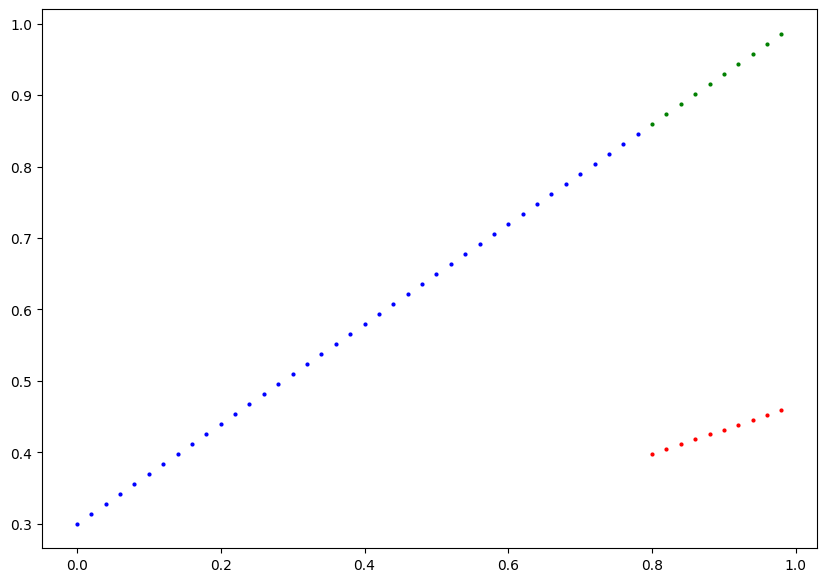

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [14]:
# defining a loss function
loss_fn = nn.L1Loss() # this is the MAE loss

# defining an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # this is the gradient descent method

In [15]:
torch.manual_seed(42)

epochs = 100
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
        if(epoch % 10 == 0):
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f'Epoch: {epoch} | MAE train loss: {loss} | MAE Test loss: {test_loss}')

Epoch: 0 | MAE train loss: 0.31288138031959534 | MAE Test loss: 0.48106518387794495
Epoch: 10 | MAE train loss: 0.1976713240146637 | MAE Test loss: 0.3463551998138428
Epoch: 20 | MAE train loss: 0.08908725529909134 | MAE Test loss: 0.21729660034179688
Epoch: 30 | MAE train loss: 0.053148526698350906 | MAE Test loss: 0.14464017748832703
Epoch: 40 | MAE train loss: 0.04543796554207802 | MAE Test loss: 0.11360953003168106
Epoch: 50 | MAE train loss: 0.04167863354086876 | MAE Test loss: 0.09919948130846024
Epoch: 60 | MAE train loss: 0.03818932920694351 | MAE Test loss: 0.08886633068323135
Epoch: 70 | MAE train loss: 0.03476089984178543 | MAE Test loss: 0.0805937647819519
Epoch: 80 | MAE train loss: 0.03132382780313492 | MAE Test loss: 0.07232122868299484
Epoch: 90 | MAE train loss: 0.02788739837706089 | MAE Test loss: 0.06473556160926819


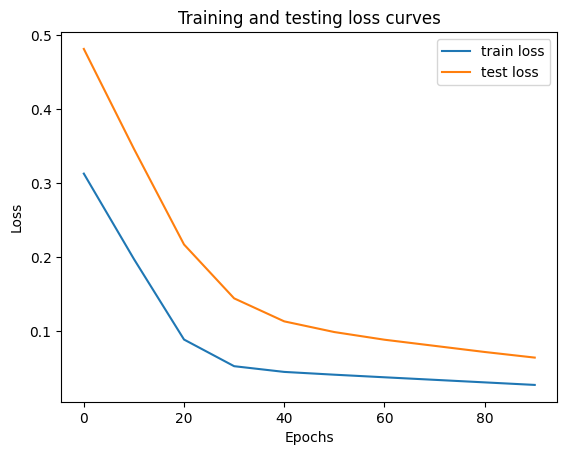

In [16]:
plt.plot(epoch_count, train_loss_values, label = "train loss")
plt.plot(epoch_count, test_loss_values, label = "test loss")
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()


In [17]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [18]:
model_0.eval()

with torch.inference_mode():
    preds = model_0(X_test)

preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

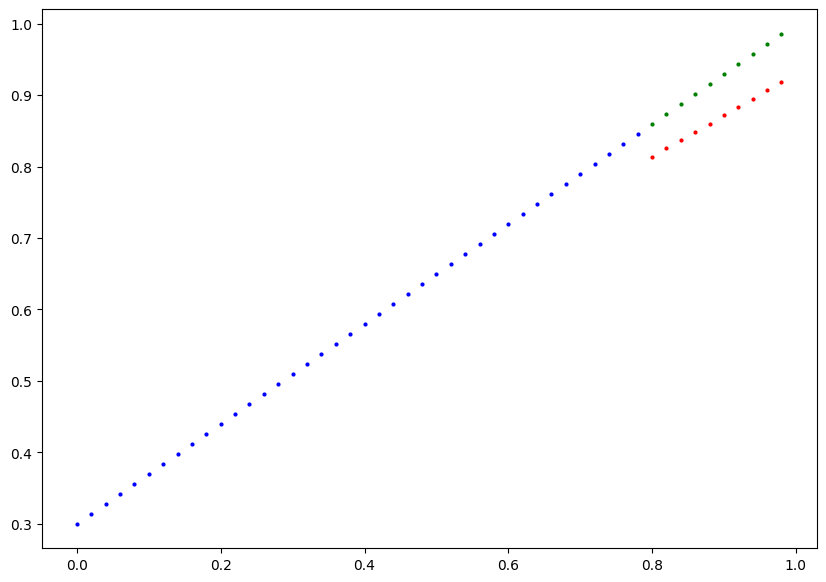

In [19]:
plot_predictions(predictions=preds)

In [20]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [23]:
loaded_model_0 = LinearRegressModel()
print("Original State Dict - > ", loaded_model_0.state_dict())
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

print("Updated State Dict - > ", loaded_model_0.state_dict())

Original State Dict - >  OrderedDict([('weight', tensor([-1.1229])), ('bias', tensor([-0.1863]))])
Updated State Dict - >  OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])


<ipython-input-23-ea0fc85180eb>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
